In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv("advertising.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [6]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
data.Age.value_counts()

Age
31    60
36    50
29    48
28    48
33    43
30    39
35    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
39    30
45    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
22    13
47    13
51    12
53    10
54     9
55     7
20     6
57     6
21     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: count, dtype: int64

<Axes: >

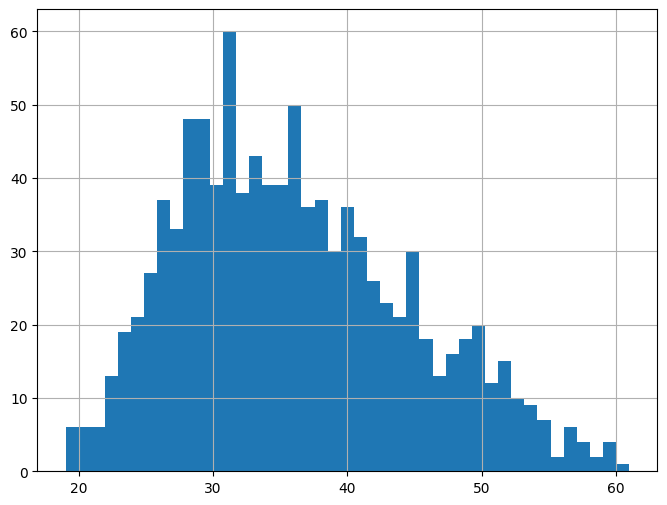

In [8]:
plt.figure(figsize=(8,6))
data.Age.hist(bins=data.Age.nunique())

Text(0, 0.5, 'Y')

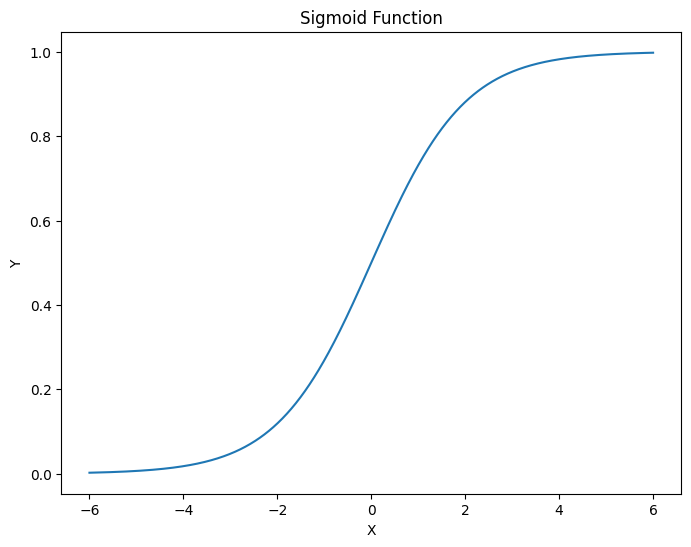

In [9]:
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(8,6))
plt.plot(x, 1/(1+(np.exp(-x))))
plt.title("Sigmoid Function")
plt.xlabel("X")
plt.ylabel("Y")

<Figure size 800x600 with 0 Axes>

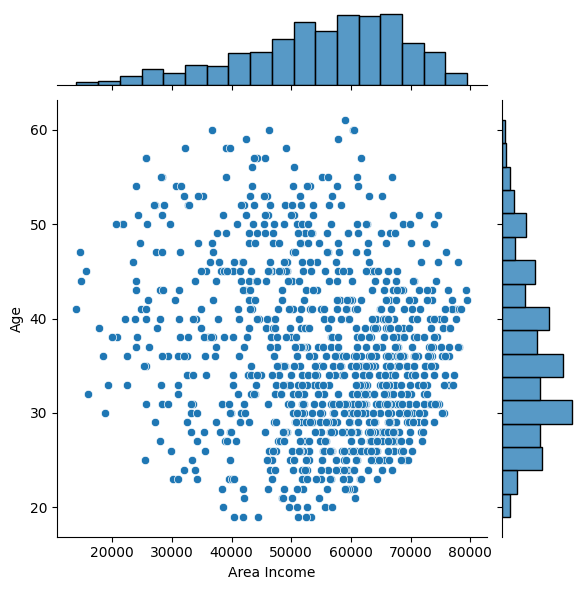

In [10]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Area Income"], y=data.Age)

<Figure size 800x600 with 0 Axes>

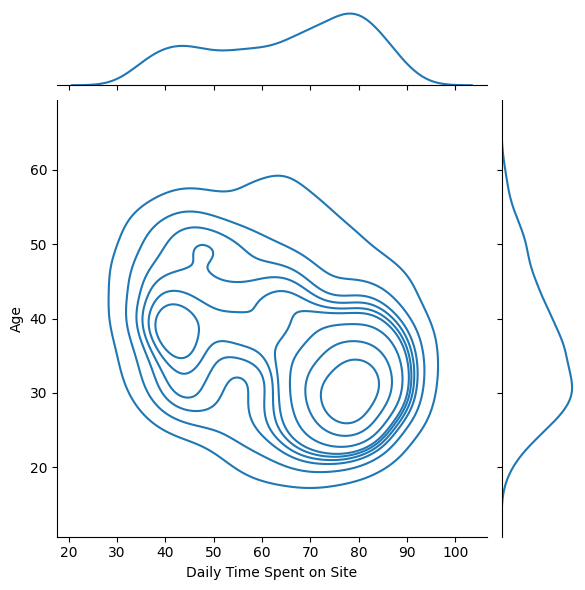

In [11]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Daily Time Spent on Site"], y=data.Age, kind="kde")

In [89]:
from sklearn.model_selection import train_test_split

X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)

y = data["Clicked on Ad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
def sigmoid(z):
    """
    Compute the sigmoid of z in a numerically stable way.
    
    Parameters:
    z (numpy array): Input array or scalar.
    
    Returns:
    numpy array or scalar: Sigmoid of the input.
    """
    # Clip the input to avoid overflow
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

In [85]:
def logistic_loss(w, b, X, y):
    """
    Compute the logistic loss function in a numerically stable way.
    
    Parameters:
    w (numpy array): Weights.
    b (float): Bias.
    X (numpy array): Input features.
    y (numpy array): True target values.
    
    Returns:
    float: Logistic loss.
    """
    m = X.shape[0]
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    epsilon = 1e-15
    
    # Clip y_pred to avoid log(0) and log(1)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Compute the loss
    loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    return loss

    
    

In [86]:
def compute_gradient(w, b, X, y):
    """
    Compute gradients for weights and bias.
    
    Parameters:
    w (numpy array): Weights.
    b (float): Bias.
    X (numpy array): Input features.
    y (numpy array): True target values.
    
    Returns:
    dw (numpy array): Gradient for weights.
    db (float): Gradient for bias.
    """
    m = X.shape[0]
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    # Compute gradients
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    
    return dw, db




In [87]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    """
    Perform gradient descent to learn weights and bias.
    
    Parameters:
    X (numpy array): Input features.
    y (numpy array): Target values.
    learning_rate (float): Learning rate.
    epochs (int): Number of iterations.
    
    Returns:
    w (numpy array): Learned weights.
    b (float): Learned bias.
    losses (list): List of loss values over epochs.
    """
    n_features = X.shape[1]
    w = np.zeros(n_features)
    b = 0
    losses = []
    
    for epoch in range(epochs):
        # Compute gradients
        dw, db = compute_gradient(w, b, X, y)
        
        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Compute and record loss
        loss = logistic_loss(w, b, X, y)
        losses.append(loss)
        
        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss}")
    
    return w, b, losses


In [92]:
# Generate random data
np.random.seed(42)


# Train logistic regression model using gradient descent
w, b, losses = gradient_descent(X_train_scaled, y_train)

print("Learned weights:", w)
print("Learned bias:", b)
print(np.unique(y_train)) 


Epoch 0: Loss = 0.6889552842077623
Epoch 100: Loss = 0.4236479679053505
Epoch 200: Loss = 0.31168029580271117
Epoch 300: Loss = 0.2538402874030287
Epoch 400: Loss = 0.21924869062333163
Epoch 500: Loss = 0.19640363088370769
Epoch 600: Loss = 0.18022960955809544
Epoch 700: Loss = 0.16818109573045478
Epoch 800: Loss = 0.15885273677714679
Epoch 900: Loss = 0.15140928715281948
Learned weights: [-1.10679708  0.62085576 -0.65780803 -1.27341231 -0.08631485]
Learned bias: 0.07800036309498888
[0 1]


In [96]:
def predict(X, w, b):
    """
    Predict the probability of the positive class.
    
    Parameters:
    X (numpy array): Input features.
    w (numpy array): Weights.
    b (float): Bias.
    
    Returns:
    numpy array: Predicted probabilities.
    """
    z = np.dot(X, w) + b
    y_pred_prob = sigmoid(z)
    return y_pred_prob

In [102]:
predict([[ 0.66499447,  0.30753332,  0.6842786 ,  1.52106049,  1.04381619],[ 1.56077247,  0.41953817,  0.35607887,  0.29783409, -0.95802308], [-0.52791046,  0.64354788,  1.32636636, -0.95137476, -0.95802308]], [-1.10679708,  0.62085576, -0.65780803, -1.27341231, -0.08631485], 0.07800036309498888)


array([0.05000956, 0.12788489, 0.81510518])

In [98]:
X_train_scaled


array([[ 0.66499447,  0.30753332,  0.6842786 ,  1.52106049,  1.04381619],
       [-1.19503265, -0.47650064,  0.79385516, -0.75764596, -0.95802308],
       [ 0.27364125, -1.2605346 ,  0.81544168,  0.73429367, -0.95802308],
       ...,
       [ 1.65248607,  0.97956243, -0.21264408,  0.0339071 ,  1.04381619],
       [-0.52791046,  0.64354788,  1.32636636, -0.95137476, -0.95802308],
       [ 1.56077247,  0.41953817,  0.35607887,  0.29783409, -0.95802308]])

In [100]:
predict([[ 1.56077247,  0.41953817,  0.35607887,  0.29783409, -0.95802308]], [-1.10679708,  0.62085576, -0.65780803, -1.27341231, -0.08631485], 0.07800036309498888)

array([0.12788489])